In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
from datetime import datetime, date
import json
from xgrads import open_CtlDataset
import geopandas as gpd
import requests
import hydrofunctions as hf
import matplotlib.pyplot as plt
from shapely import geometry as sgeom
import folium 
%matplotlib inline

In [2]:
# Choose a domain
domain = 'YUKO'

# Path to the SnowModel folder
gagepath = '/nfs/attic/dfh/2020_NPRB/data/stream_gage/'+domain+'/'

#path to NPRB domains
domains_resp = requests.get("https://raw.githubusercontent.com/NPRB/02_preprocess_python/main/NPRB_domains.json")
domains = domains_resp.json()

# SE AK
# domain_list = ['JUNE','KLAW','SITK','TAKU']
# arctic
# domain_list = ['BEAU', 'BRIS','CHUK','YUKO']
domain_list = [domain]
# all domains have the same start date
st_dt = '2011-10-01'
ed_dt = '2018-09-30'

# get USGS station data

In [3]:
# get database of USGS stations in the state of alaska
alaska = hf.NWIS(None,'dv', st_dt,ed_dt,parameterCd='00060',stateCd='AK', file='Q.parquet')
# build discharge dataframe
# gives discharge timeseries for each gague
akQ = alaska.df('discharge')
# list of station IDs
fullstnlist = [val[5:13] for val in akQ.columns]

# get lat lon for each station and build dataframe of metadata
for i in range(len(fullstnlist)):
    stn = fullstnlist[i]
    if i ==0:
        # individual station metadata in a df
        dfs = hf.site_file(stn).table
    else:
        try:
            output = hf.site_file(stn).table
            # add individual station to large df
            dfs = pd.concat([dfs, output])
        except:
            continue
# turn dataframe into geodataframe containing station metadata
gdfs = gpd.GeoDataFrame(dfs,geometry=gpd.points_from_xy(dfs.dec_long_va, dfs.dec_lat_va),crs='epsg:4326')


Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&stateCd=AK&parameterCd=00060&startDT=2011-10-01&endDT=2018-09-30
Saving data to Q.parquet
Retrieved the site file for site #15008000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15008000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15009000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15009000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15015595 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15015595&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15019990 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15019990&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15024800 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15024800&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15041200 from https://waterservices.us

In [4]:
akQ

,USGS:15008000:00060:00003,USGS:15009000:00060:00003,USGS:15015595:00060:00003,USGS:15019990:00060:00003,USGS:15024800:00060:00003,USGS:15041200:00060:00003,USGS:15051010:00060:00003,USGS:15052000:00060:00003,USGS:15052500:00060:00003,USGS:15052800:00060:00003,...,USGS:15744500:00060:00003,USGS:15747000:00060:00003,USGS:15803000:00060:00003,USGS:15875000:00060:00003,USGS:15896000:00060:00003,USGS:15905100:00060:00003,USGS:15908000:00060:00003,USGS:15955000:00060:00003,USGS:15960000:00060:00003,USGS:15980000:00060:00003
datetimeUTC,,,,,,,,,,,,,,,,,,,,,
2011-10-01 00:00:00+00:00,956.0,690.0,NaN,214.0,70200.0,10900.0,52.2,86.1,1090.0,98.5,...,13800.0,557.0,500.0,7450.0,800.0,160.0,840.0,750.0,25.0,124.0
2011-10-02 00:00:00+00:00,810.0,451.0,NaN,172.0,59900.0,9830.0,44.5,62.4,755.0,73.6,...,13300.0,533.0,400.0,6900.0,600.0,160.0,900.0,770.0,20.0,112.0
2011-10-03 00:00:00+00:00,762.0,365.0,NaN,133.0,53700.0,8940.0,37.6,49.2,581.0,61.5,...,12900.0,450.0,280.0,6340.0,650.0,150.0,820.0,730.0,18.0,103.0
2011-10-04 00:00:00+00:00,778.0,359.0,NaN,108.0,49800.0,8300.0,32.5,51.2,494.0,54.5,...,12600.0,410.0,240.0,5000.0,500.0,150.0,720.0,660.0,17.0,121.0
2011-10-05 00:00:00+00:00,776.0,348.0,NaN,85.5,47600.0,7850.0,29.6,50.6,463.0,49.7,...,12400.0,453.0,260.0,3800.0,400.0,140.0,680.0,600.0,16.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-26 00:00:00+00:00,1300.0,NaN,6430.0,0.0,50400.0,12000.0,NaN,837.0,4020.0,NaN,...,18100.0,797.0,712.0,8750.0,4150.0,319.0,2440.0,NaN,NaN,237.0
2018-09-27 00:00:00+00:00,1590.0,NaN,5750.0,0.0,53900.0,12600.0,NaN,232.0,4040.0,NaN,...,17000.0,761.0,758.0,8180.0,3970.0,340.0,2720.0,NaN,NaN,215.0
2018-09-28 00:00:00+00:00,1540.0,NaN,4680.0,0.0,48900.0,10000.0,NaN,178.0,2700.0,NaN,...,15900.0,711.0,777.0,7840.0,3630.0,262.0,2590.0,NaN,NaN,227.0


In [5]:
# slice discharge values to time period of interest
akQs = akQ[st_dt:ed_dt]
# drop stations with no data
s = (akQs.isnull().apply(sum, axis=0))/len(akQs)
akQslice = akQs[akQs.columns.intersection(s[s<1].index)]
akQslice

,USGS:15008000:00060:00003,USGS:15009000:00060:00003,USGS:15015595:00060:00003,USGS:15019990:00060:00003,USGS:15024800:00060:00003,USGS:15041200:00060:00003,USGS:15051010:00060:00003,USGS:15052000:00060:00003,USGS:15052500:00060:00003,USGS:15052800:00060:00003,...,USGS:15744500:00060:00003,USGS:15747000:00060:00003,USGS:15803000:00060:00003,USGS:15875000:00060:00003,USGS:15896000:00060:00003,USGS:15905100:00060:00003,USGS:15908000:00060:00003,USGS:15955000:00060:00003,USGS:15960000:00060:00003,USGS:15980000:00060:00003
datetimeUTC,,,,,,,,,,,,,,,,,,,,,
2011-10-01 00:00:00+00:00,956.0,690.0,NaN,214.0,70200.0,10900.0,52.2,86.1,1090.0,98.5,...,13800.0,557.0,500.0,7450.0,800.0,160.0,840.0,750.0,25.0,124.0
2011-10-02 00:00:00+00:00,810.0,451.0,NaN,172.0,59900.0,9830.0,44.5,62.4,755.0,73.6,...,13300.0,533.0,400.0,6900.0,600.0,160.0,900.0,770.0,20.0,112.0
2011-10-03 00:00:00+00:00,762.0,365.0,NaN,133.0,53700.0,8940.0,37.6,49.2,581.0,61.5,...,12900.0,450.0,280.0,6340.0,650.0,150.0,820.0,730.0,18.0,103.0
2011-10-04 00:00:00+00:00,778.0,359.0,NaN,108.0,49800.0,8300.0,32.5,51.2,494.0,54.5,...,12600.0,410.0,240.0,5000.0,500.0,150.0,720.0,660.0,17.0,121.0
2011-10-05 00:00:00+00:00,776.0,348.0,NaN,85.5,47600.0,7850.0,29.6,50.6,463.0,49.7,...,12400.0,453.0,260.0,3800.0,400.0,140.0,680.0,600.0,16.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-26 00:00:00+00:00,1300.0,NaN,6430.0,0.0,50400.0,12000.0,NaN,837.0,4020.0,NaN,...,18100.0,797.0,712.0,8750.0,4150.0,319.0,2440.0,NaN,NaN,237.0
2018-09-27 00:00:00+00:00,1590.0,NaN,5750.0,0.0,53900.0,12600.0,NaN,232.0,4040.0,NaN,...,17000.0,761.0,758.0,8180.0,3970.0,340.0,2720.0,NaN,NaN,215.0
2018-09-28 00:00:00+00:00,1540.0,NaN,4680.0,0.0,48900.0,10000.0,NaN,178.0,2700.0,NaN,...,15900.0,711.0,777.0,7840.0,3630.0,262.0,2590.0,NaN,NaN,227.0


In [6]:
# function to identify stations within the domain. Then gets discharge and 
# metadata for the 10 satation in the domain with the largest upslope areas. 
# gdf is reprojected to model projection.
def get_Q(gdfs, domgdf, proj):
    #index of stations that fall into in the domain
    mask = gdfs.within(domgdf.loc[0].geometry)
    #gdf of stns in the domain
    stnmeta = gdfs.loc[mask]
    # if there are more than 10 stations in the domain
    # select the 10 stations with the largest upslope area
    if len(stnmeta)>10:
        # sort stations by upslope area
        stnmeta = stnmeta.sort_values('drain_area_va',ascending = False)
        # drop duplicates
        stnmeta = stnmeta.drop_duplicates()
        # select 10 largest stations
        stnmeta = stnmeta[0:10]
        # sort stations by station id area
        stnmeta = stnmeta.sort_values('site_no')
    # reset index
    stnmeta = stnmeta.reset_index(drop=True)
    # project gdf to model coordinates
    stnmetaproj=stnmeta.to_crs(proj)
    stnmetaproj = stnmetaproj.reset_index(drop=True)
    # list of column names for stations in domain
    stnQlist = ['USGS:'+val+':00060:00003' for val in stnmeta.site_no.to_list()]
    # dataframe of Q across domain
    Qdf = akQslice[akQslice.columns.intersection(stnQlist)]
    #Qdf = akQ[akQ.columns.intersection(stnQlist)]
    return Qdf, stnmeta, stnmetaproj



In [7]:
# run the functions
for domain in domain_list:
    print(domain)
    # projections
    proj = domains[domain]['mod_proj']
    stn_proj = domains[domain]['stn_proj']
    
    # set input parameters
    if domain == 'BEAU' or domain == 'BRIS' or domain == 'CHUK' or domain == 'YUKO':
        SHAPEpath = '/nfs/attic/dfh/2020_NPRB/data/gis/'+domain+'/'+domain+'.json'
            # open shapefile of interest basin
        domgdf = gpd.read_file(SHAPEpath)
    else:
        # build polygon from domain bounds
        Bbox = domains[domain]['Bbox']
        # Convert the bounding box dictionary to a shapely Polygon geometry using sgeom.box
        box_sgeom = sgeom.box(Bbox['lonmin'], Bbox['latmin'], Bbox['lonmax'], Bbox['latmax'])
        domgdf = gpd.GeoDataFrame(geometry=[box_sgeom], crs=stn_proj)
    
    # get gage data
    Qdf, stnmeta, stnmetaproj = get_Q(gdfs, domgdf, proj)
    

    #save discharge data
    gagepath = '/nfs/attic/dfh/2020_NPRB/data/stream_gage/'+domain+'/'
    path = gagepath+domain+'_discharge_cfs_'+st_dt+'_'+ed_dt+'.csv'
    Qdf.to_csv(path)
    
    # save metadata gdfs
    path=gagepath+domain+'_gage_meta_'+st_dt+'_'+ed_dt+'.geojson'
    stnmeta.to_file(path, driver='GeoJSON')  
    path=gagepath+domain+'_gage_meta_proj_'+st_dt+'_'+ed_dt+'.geojson'
    stnmetaproj.to_file(path, driver='GeoJSON') 

YUKO


/nfs/attic/dfh/miniconda/envs/nprb/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/nfs/attic/dfh/miniconda/envs/nprb/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [8]:
Qdf

,USGS:15348000:00060:00003,USGS:15356000:00060:00003,USGS:15452100:00060:00003,USGS:15453500:00060:00003,USGS:15484000:00060:00003,USGS:15493400:00060:00003,USGS:15493700:00060:00003,USGS:15514000:00060:00003,USGS:15515500:00060:00003,USGS:15565447:00060:00003
datetimeUTC,,,,,,,,,,
2011-10-01 00:00:00+00:00,2990.0,109000.0,1450.0,159000.0,2420.0,1450.0,1600.0,1980.0,22900.0,323000.0
2011-10-02 00:00:00+00:00,2800.0,107000.0,1390.0,157000.0,2340.0,1410.0,1550.0,1930.0,22400.0,320000.0
2011-10-03 00:00:00+00:00,2700.0,105000.0,1320.0,155000.0,2280.0,1380.0,1510.0,1890.0,22000.0,317000.0
2011-10-04 00:00:00+00:00,2440.0,103000.0,1270.0,152000.0,2230.0,1350.0,1470.0,1840.0,21700.0,314000.0
2011-10-05 00:00:00+00:00,2050.0,101000.0,1200.0,149000.0,2180.0,1300.0,1430.0,1800.0,21400.0,310000.0
...,...,...,...,...,...,...,...,...,...,...
2018-09-26 00:00:00+00:00,2790.0,87400.0,NaN,158000.0,5460.0,6220.0,5380.0,6470.0,38700.0,426000.0
2018-09-27 00:00:00+00:00,2660.0,85100.0,NaN,155000.0,5680.0,5760.0,5570.0,6900.0,39100.0,421000.0
2018-09-28 00:00:00+00:00,2490.0,82300.0,NaN,153000.0,5270.0,5090.0,5110.0,6740.0,38300.0,415000.0


<Axes: >

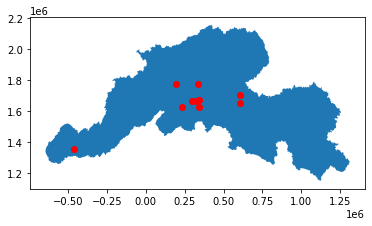

In [9]:
# plot domain shapefile and stations 
# open shapefile of interest basin
fig,ax = plt.subplots()
# add projected coordinates to domain shapefile
domproj = domgdf.to_crs(stnmetaproj.crs)
# plot domain
domproj.plot(ax=ax)
# plot stations
stnmetaproj.plot(ax=ax,c='r')

# single domain

In [7]:
# get USGS stations in the state of alaska
alaska = hf.NWIS(None,'dv', domains[domain]['st'],domains[domain]['ed'],parameterCd='00060',stateCd='AK', file='Q.parquet')
alaska

Reading data from Q.parquet


USGS:15008000: SALMON R NR HYDER AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15009000: SOULE R NR HYDER AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15015595: UNUK R BL BLUE R NR WRANGELL AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15019990: TYEE LK OUTLET NR WRANGELL AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15022000: HARDING R NR WRANGELL AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15024800: STIKINE R NR WRANGELL AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15028300: FARRAGUT R NR PETERSBURG AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15039900: DOROTHY LK OUTLET NR JUNEAU AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15040000: DOROTHY C NR JUNEAU AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15041200: TAKU R NR JUNEAU AK
    00060: <Day>  Discharge, cubic feet per second 
USGS:15049900: GOLD C NR JUNEAU AK
    00060: <Day>  Discharge, cubic feet 

In [8]:
# build discharge dataframe
akQ = alaska.df('discharge')
akQ

,USGS:15008000:00060:00003,USGS:15009000:00060:00003,USGS:15015595:00060:00003,USGS:15019990:00060:00003,USGS:15022000:00060:00003,USGS:15024800:00060:00003,USGS:15028300:00060:00003,USGS:15039900:00060:00003,USGS:15040000:00060:00003,USGS:15041200:00060:00003,...,USGS:15862500:00060:00003,USGS:15875000:00060:00003,USGS:15896000:00060:00003,USGS:15904800:00060:00003,USGS:15905100:00060:00003,USGS:15906000:00060:00003,USGS:15908000:00060:00003,USGS:15955000:00060:00003,USGS:15960000:00060:00003,USGS:15980000:00060:00003
datetimeUTC,,,,,,,,,,,,,,,,,,,,,
1988-10-01 00:00:00+00:00,NaN,NaN,NaN,NaN,1070.0,71800.0,3570.0,185.0,NaN,15500.0,...,NaN,NaN,190.0,NaN,NaN,NaN,680.0,NaN,NaN,NaN
1988-10-02 00:00:00+00:00,NaN,NaN,NaN,NaN,797.0,58900.0,2580.0,159.0,NaN,14000.0,...,NaN,NaN,180.0,NaN,NaN,NaN,640.0,NaN,NaN,NaN
1988-10-03 00:00:00+00:00,NaN,NaN,NaN,NaN,730.0,54900.0,2380.0,154.0,NaN,13000.0,...,NaN,NaN,170.0,NaN,NaN,NaN,600.0,NaN,NaN,NaN
1988-10-04 00:00:00+00:00,NaN,NaN,NaN,NaN,1170.0,61500.0,4330.0,232.0,NaN,15000.0,...,NaN,NaN,170.0,NaN,NaN,NaN,580.0,NaN,NaN,NaN
1988-10-05 00:00:00+00:00,NaN,NaN,NaN,NaN,1630.0,83100.0,4280.0,306.0,NaN,16000.0,...,NaN,NaN,160.0,NaN,NaN,NaN,540.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26 00:00:00+00:00,1550.0,NaN,5530.0,0.00,NaN,58300.0,NaN,NaN,NaN,8310.0,...,NaN,21700.0,2720.0,NaN,NaN,NaN,1450.0,NaN,NaN,209.0
2020-09-27 00:00:00+00:00,2370.0,NaN,9610.0,18.60,NaN,63700.0,NaN,NaN,NaN,9120.0,...,NaN,19800.0,2330.0,NaN,NaN,NaN,1320.0,NaN,NaN,199.0
2020-09-28 00:00:00+00:00,2230.0,NaN,13500.0,65.00,NaN,90600.0,NaN,NaN,NaN,15500.0,...,NaN,18400.0,1990.0,NaN,NaN,NaN,1260.0,NaN,NaN,192.0


In [9]:
#list of stations
fullstnlist = [val[5:13] for val in akQ.columns]

# get lat lon for each station and build dataframe of metadata
for i in range(len(fullstnlist)):
    stn = fullstnlist[i]
    if i ==0:
        dfs = hf.site_file(stn).table
    else:
        try:
            output = hf.site_file(stn).table
            dfs = pd.concat([dfs, output])
        except:
            continue
dfs

Retrieved the site file for site #15008000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15008000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15009000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15009000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15015595 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15015595&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15019990 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15019990&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15022000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15022000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15024800 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15024800&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15028300 from https://waterservices.usgs.gov/nwis/site

Retrieved the site file for site #15238500 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238500&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238600 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238600&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238648 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238648&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238820 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238820&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238978 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238978&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238982 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=15238982&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #15238984 from https://waterservices.usgs.gov/nwis/site

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,15008000,SALMON R NR HYDER AK,ST,560134.0,1300355.0,56.025815,-130.066982,M,R,...,Y,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15009000,SOULE R NR HYDER AK,ST,555000.0,1301054.0,55.833029,-130.183369,M,S,...,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15015595,UNUK R BL BLUE R NR WRANGELL AK,ST,561426.0,1305249.0,56.240206,-130.881986,M,R,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15019990,TYEE LK OUTLET NR WRANGELL AK,ST,561200.0,1313024.0,56.199641,-131.508362,M,S,...,Y,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15022000,HARDING R NR WRANGELL AK,ST,561248.0,1313812.0,56.212978,-131.638359,M,T,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,USGS,15906000,SAGAVANIRKTOK R TRIB NR PUMP STA 3 AK,ST,684113.0,1490542.0,68.686574,-149.097790,M,U,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15908000,SAGAVANIRKTOK R NR PUMP STA 3 AK,ST,690057.0,1484904.0,69.015833,-148.817778,N,5,...,Y,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15955000,CANNING R AB STAINES R NR DEADHORSE AK,ST,695255.0,1462309.0,69.881705,-146.388699,G,S,...,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,USGS,15960000,TAMAYARIAK R NR KAKTOVIK AK,ST,695155.0,1453534.0,69.865056,-145.595592,G,S,...,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# turn dataframe into geodataframe
gdfs = gpd.GeoDataFrame(dfs,geometry=gpd.points_from_xy(dfs.dec_long_va, dfs.dec_lat_va),crs='epsg:4326')
gdfs

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,geometry
0,USGS,15008000,SALMON R NR HYDER AK,ST,560134.0,1300355.0,56.025815,-130.066982,M,R,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-130.06698 56.02582)
0,USGS,15009000,SOULE R NR HYDER AK,ST,555000.0,1301054.0,55.833029,-130.183369,M,S,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-130.18337 55.83303)
0,USGS,15015595,UNUK R BL BLUE R NR WRANGELL AK,ST,561426.0,1305249.0,56.240206,-130.881986,M,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-130.88199 56.24021)
0,USGS,15019990,TYEE LK OUTLET NR WRANGELL AK,ST,561200.0,1313024.0,56.199641,-131.508362,M,S,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-131.50836 56.19964)
0,USGS,15022000,HARDING R NR WRANGELL AK,ST,561248.0,1313812.0,56.212978,-131.638359,M,T,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-131.63836 56.21298)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,USGS,15906000,SAGAVANIRKTOK R TRIB NR PUMP STA 3 AK,ST,684113.0,1490542.0,68.686574,-149.097790,M,U,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-149.09779 68.68657)
0,USGS,15908000,SAGAVANIRKTOK R NR PUMP STA 3 AK,ST,690057.0,1484904.0,69.015833,-148.817778,N,5,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-148.81778 69.01583)
0,USGS,15955000,CANNING R AB STAINES R NR DEADHORSE AK,ST,695255.0,1462309.0,69.881705,-146.388699,G,S,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-146.38870 69.88171)
0,USGS,15960000,TAMAYARIAK R NR KAKTOVIK AK,ST,695155.0,1453534.0,69.865056,-145.595592,G,S,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-145.59559 69.86506)


<Axes: >

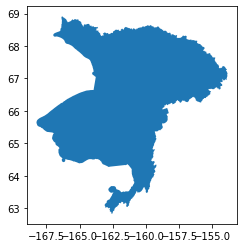

In [13]:
# open shapefile of interest basin
h2sdpath = '/nfs/attic/dfh/2020_NPRB/data/gis/'+domain+'/'+domain+'.json'
domgdf = gpd.read_file(h2sdpath)
domgdf.plot()

In [14]:
#index of stations that fall into in the domain
mask = gdfs.within(domgdf.loc[0].geometry) 
mask

0    False
0    False
0    False
0    False
0    False
     ...  
0    False
0    False
0    False
0    False
0    False
Length: 279, dtype: bool

In [15]:
#gdf of stns in the domain
instn = gdfs.loc[mask]
instn = instn.reset_index(drop=True)


In [17]:
# if there are more than 10 stations 
# select the 10 stations with the largest upslope area
if len(instn) > 10:
    # sort stations by upslope area
    instn = instn.sort_values('drain_area_va',ascending = False)
    # select 10 largest stations
    instn = instn[0:10]
    # sort stations by station id area
    instn = instn.sort_values('site_no')
    # reset index
    instn=instn.reset_index(drop=True)

In [19]:
# project gdf to model coordinates
stnproj=instn.to_crs(domains[domain]['mod_proj'])
stnproj = stnproj.reset_index(drop=True)

stnproj

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,geometry
0,USGS,15565700,UNALAKLEET R AB CHIROSKEY R NR UNALAKLEET AK,ST,635606.0,1601818.0,63.934297,-160.307472,M,S,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-308388.091 1566798.002)
1,USGS,15580095,NIUKLUK R AB MELSING C AT COUNCIL AK,ST,645331.0,1634012.0,64.891944,-163.670000,N,S,...,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-456325.261 1692287.300)
2,USGS,15621000,SNAKE R NR NOME AK,ST,643351.0,1653026.0,64.563397,-165.509808,M,U,...,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-548664.359 1670023.966)
3,USGS,15744500,KOBUK R NR KIANA AK,ST,665825.0,1600751.0,66.972994,-160.133631,M,T,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-268698.713 1903009.388)
4,USGS,15746900,WULIK R AB FERRIC C NR KIVALINA AK,ST,680442.0,1631115.0,68.077675,-163.190455,M,T,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-385009.770 2039698.999)
5,USGS,15746980,IKALUKROK C AB RED DOG C NR KIVALINA AK,ST,680538.0,1625647.0,68.093236,-162.949346,M,U,...,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-374739.933 2040025.119)
6,USGS,15746990,RED DOG C AB MOUTH NR KIVALINA AK,ST,680522.0,1625622.0,68.088791,-162.942401,G,S,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-374516.875 2039498.785)
7,USGS,15746990,RED DOG C AB MOUTH NR KIVALINA AK,ST,680522.0,1625622.0,68.088791,-162.942401,G,S,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-374516.875 2039498.785)
8,USGS,15746991,IKALUKROK C BL RED DOG C NR KIVALINA AK,ST,680251.0,1630134.0,68.046845,-163.029062,M,T,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-378752.998 2035392.305)
9,USGS,15747000,WULIK R BL TUTAK C NR KIVALINA AK,ST,675234.0,1634028.0,67.875440,-163.677373,M,T,...,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-408516.582 2020453.978)


In [20]:
# save domain discharge data for later use
# list of column names for stations in domain
stnQlist = ['USGS:'+val+':00060:00003' for val in instn.site_no.to_list()]
# dataframe of Q across domain
indf = akQ[akQ.columns.intersection(stnQlist)]
path = gagepath+domain+'_discharge_cfs.csv'
#indf.to_csv(path)
indf

,USGS:15565700:00060:00003,USGS:15580095:00060:00003,USGS:15621000:00060:00003,USGS:15744500:00060:00003,USGS:15746900:00060:00003,USGS:15746980:00060:00003,USGS:15746990:00060:00003,USGS:15746991:00060:00003,USGS:15747000:00060:00003
datetimeUTC,,,,,,,,,
1988-10-01 00:00:00+00:00,NaN,NaN,225.0,31700.0,NaN,NaN,NaN,NaN,975.0
1988-10-02 00:00:00+00:00,NaN,NaN,219.0,32500.0,NaN,NaN,NaN,NaN,891.0
1988-10-03 00:00:00+00:00,NaN,NaN,198.0,32900.0,NaN,NaN,NaN,NaN,812.0
1988-10-04 00:00:00+00:00,NaN,NaN,183.0,32000.0,NaN,NaN,NaN,NaN,740.0
1988-10-05 00:00:00+00:00,NaN,NaN,160.0,30000.0,NaN,NaN,NaN,NaN,680.0
...,...,...,...,...,...,...,...,...,...
2020-09-26 00:00:00+00:00,NaN,1090.0,206.0,26900.0,NaN,NaN,NaN,NaN,567.0
2020-09-27 00:00:00+00:00,NaN,1050.0,199.0,25000.0,NaN,NaN,NaN,NaN,535.0
2020-09-28 00:00:00+00:00,NaN,1020.0,196.0,23300.0,NaN,NaN,NaN,NaN,515.0


In [14]:
# save metadata
path=gagepath+domain+'_gage_meta.geojson'
instn.to_file(path, driver='GeoJSON')  
path=gagepath+domain+'_gage_meta_proj.geojson'
stnproj.to_file(path, driver='GeoJSON') 

/nfs/attic/dfh/miniconda/envs/nprb/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/nfs/attic/dfh/miniconda/envs/nprb/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
